In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**BEGIN WITH VISUALIZING AND CLEANING DATA**

In [40]:
ttc=pd.read_csv('tested.csv')

In [41]:
ttc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
sns.set_style('whitegrid')

In [43]:
ttc.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [44]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: >

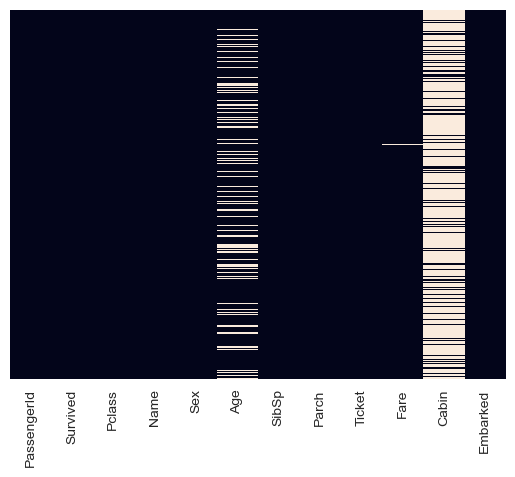

In [45]:
sns.heatmap(ttc.isnull(),yticklabels=False,cbar=False)

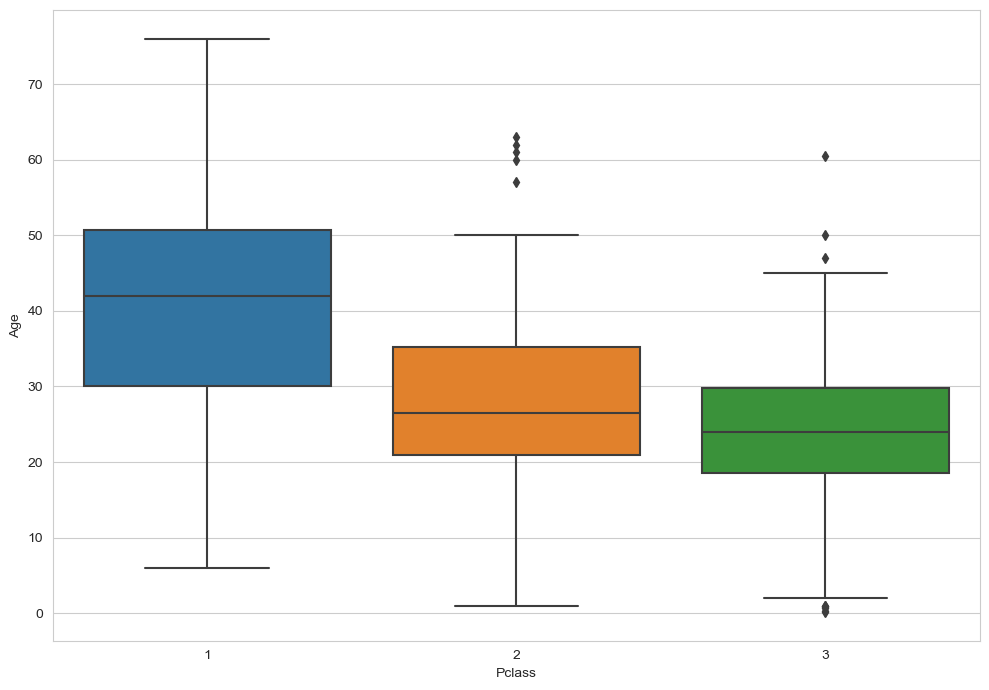

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=ttc)
plt.tight_layout()

In [47]:
#imputing values to null values in age
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26

        else:
            return 24

    else:
        return Age

In [48]:
ttc['Age']=ttc[['Age','Pclass']].apply(imputeAge,axis=1)

<Axes: >

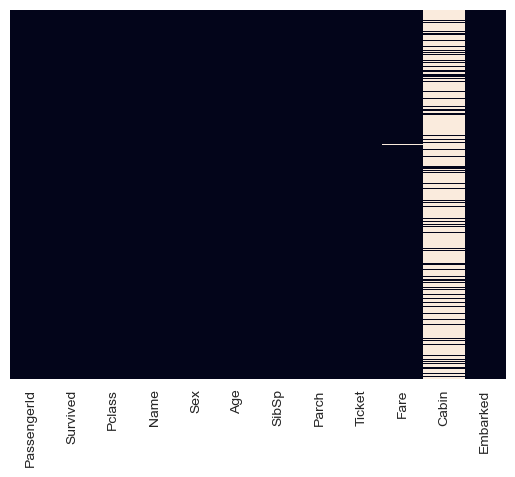

In [49]:
sns.heatmap(ttc.isnull(),yticklabels=False,cbar=False)

As we See the age is imputed with an average value

In [50]:
# Let's drop the cabin column as it has too many missing values to do anything useful with it
ttc.drop('Cabin',axis=1,inplace=True)

<Axes: >

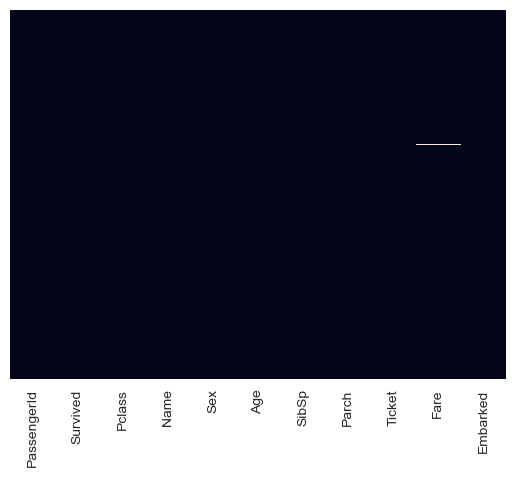

In [51]:
sns.heatmap(ttc.isnull(),yticklabels=False,cbar=False)

In [52]:
#As our missing values are almost none, let's drop the ones that exist
ttc.dropna(inplace=True)

<Axes: >

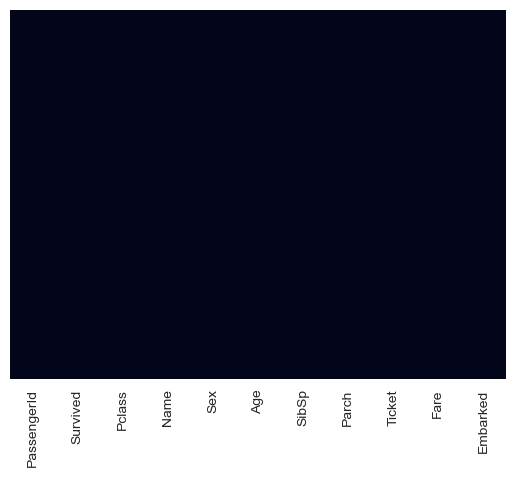

In [53]:
sns.heatmap(ttc.isnull(),yticklabels=False,cbar=False)

We have a fully filled value data to work with now

In [54]:
# Let's convert categorical features to dummy variables using pandas
sex = pd.get_dummies(ttc['Sex'],drop_first=True)
embark = pd.get_dummies(ttc['Embarked'],drop_first=True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [55]:
#Add columns to the data
ttc = pd.concat([ttc,sex,embark],axis=1)

In [56]:
#Columns Sex and embarked are not required anymore and ticket and name is not of use to us so let's drop them
ttc.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
ttc.drop('PassengerId',axis=1,inplace=True)

In [57]:
ttc.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


***BUILDING THE MODEL***

In [58]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(ttc.drop('Survived',axis=1), 
                                                    ttc['Survived'], test_size=0.20, 
                                                    random_state=31)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()

In [66]:
lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
pred = lr.predict(X_test)

****EVALUATION****

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        23

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

